# Afluencia Metro Ciudad México
En este ejercicio de estará analizando un poco la afluencia de las estaciones del metro de la Ciudad de México

  Fuente: Afluencia diaria del Metro (Simple)

  https://datos.cdmx.gob.mx/dataset/afluencia-diaria-del-metro-cdmx

Se escogió este set de datos, porque en mi día a dia utilizo el metro. Y quiero saber cuáles son las lineas y estaciones con mayor alfluencia, así como los días de la semana.

In [27]:
import pandas as pd
import numpy as np
import calendar
import locale
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [28]:
data1=pd.read_csv("https://tempbuk-2.s3.us-east-2.amazonaws.com/tmp/afluenciastc_simple_02_2024.csv")
data1.head()

,fecha,anio,mes,linea,estacion,afluencia
0,2010-01-01,2010,Enero,Linea 1,Zaragoza,20227
1,2010-01-01,2010,Enero,Linea 1,Isabel la Católica,6487
2,2010-01-01,2010,Enero,Linea 1,Moctezuma,10304
3,2010-01-01,2010,Enero,Linea 1,Pino Suárez,8679
4,2010-01-01,2010,Enero,Linea 1,Gómez Farías,19499


In [29]:
#Cambiar formato de la fecha
data1['fecha'] = pd.to_datetime(data1['fecha'])
data1 = data1[data1['fecha']>='2021-01-01']

In [30]:
# limpiar columna
data1['linea'] = data1['linea'].str.replace('Ã', 'i')
data1['linea'] = data1['linea'].str.replace('\xad', '')

In [31]:
data1.head()

,fecha,anio,mes,linea,estacion,afluencia
783510,2021-01-01,2021,Enero,Línea 1,Balbuena,2963
783511,2021-01-01,2021,Enero,Línea 1,Balderas,2676
783512,2021-01-01,2021,Enero,Línea 1,Boulevard Puerto Aéreo,8740
783513,2021-01-01,2021,Enero,Línea 1,Candelaria,2732
783514,2021-01-01,2021,Enero,Línea 1,Chapultepec,7584


In [32]:
# Crear nuevas columnas:
data1['Dia'] = data1["fecha"].dt.dayofweek
data1['Mes'] = data1["fecha"].dt.month
data1['Dia'] = data1['Dia'].apply(lambda x: calendar.day_name[x])
data1['Mes'] = data1['Mes'].apply(lambda x: calendar.month_name[x])

In [33]:
#Ordenar los datos
data1 = data1.sort_values(by=['fecha', 'linea'])
data1

,fecha,anio,mes,linea,estacion,afluencia,Dia,Mes
783510,2021-01-01,2021,Enero,Línea 1,Balbuena,2963,Friday,January
783511,2021-01-01,2021,Enero,Línea 1,Balderas,2676,Friday,January
783512,2021-01-01,2021,Enero,Línea 1,Boulevard Puerto Aéreo,8740,Friday,January
783513,2021-01-01,2021,Enero,Línea 1,Candelaria,2732,Friday,January
783514,2021-01-01,2021,Enero,Línea 1,Chapultepec,7584,Friday,January
...,...,...,...,...,...,...,...,...
1008730,2024-02-29,2024,Febrero,Línea B,Romero Rubio,16403,Thursday,February
1008731,2024-02-29,2024,Febrero,Línea B,Río de los Remedios,19512,Thursday,February
1008732,2024-02-29,2024,Febrero,Línea B,San Lázaro,17981,Thursday,February
1008733,2024-02-29,2024,Febrero,Línea B,Tepito,20752,Thursday,February


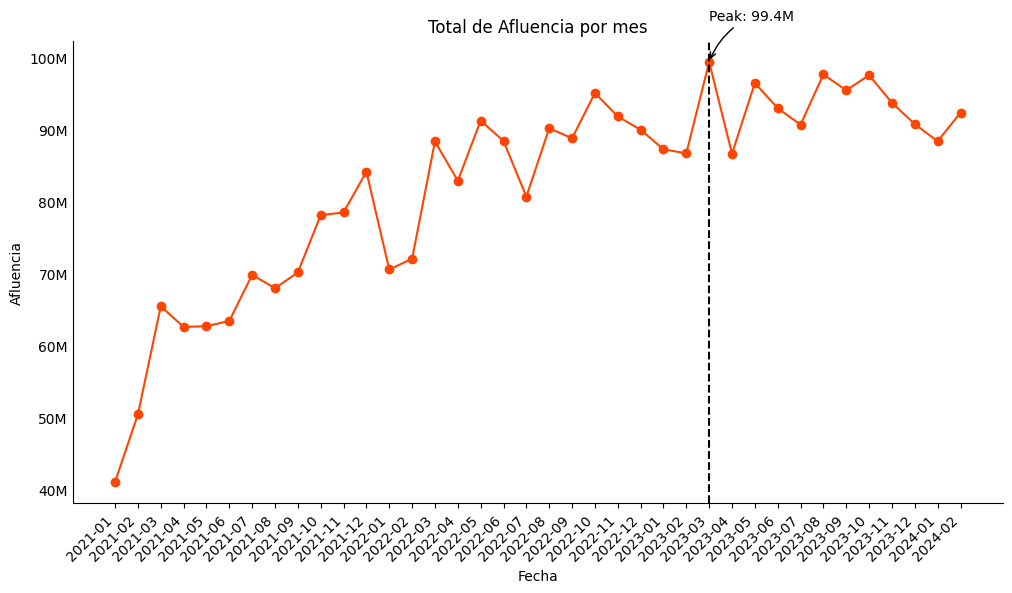

In [34]:
data1['fecha'] = pd.to_datetime(data1['fecha'])

data1['mes'] = data1['fecha'].dt.to_period('M')

# Agrupar por mes y afluencia
df_month = data1.groupby('mes')['afluencia'].sum().reset_index()

df_month['mes'] = df_month['mes'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(df_month['mes'], df_month['afluencia'], marker='o', linestyle='-', color='orangered')

formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e6)}M' if x != 0 else '0')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='y', which='both', length=0)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Afluencia')
plt.title('Total de Afluencia por mes')

index_peak = df_month['afluencia'].idxmax()

x_peak = df_month['mes'][index_peak]
y_peak = df_month['afluencia'][index_peak]

plt.annotate(f'Peak: {y_peak / 1e6:.1f}M',
             xy=(x_peak, y_peak), xycoords='data',
             xytext=(0, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.axvline(x=x_peak, color='black', linestyle='--', linewidth=1.5);

In [35]:
#Crear un nuevo DF para calcular la media más adelante
af_mean_day = data1.groupby(['Dia', 'linea']).agg({'afluencia': np.sum}).sort_values(by=['Dia', 'afluencia'], ascending=[True, False]).reset_index()

# Convertir columna Dia en una categoria ordenada
af_mean_day['Dia'] = pd.Categorical(af_mean_day['Dia'], categories=list(calendar.day_name), ordered=True)

# Agrupación y pivot
af_mean_pivot = af_mean_day.pivot(index='Dia', columns='linea', values='afluencia')
af_mean_pivot

linea,Línea 1,Línea 12,Línea 2,Línea 3,Línea 4,Línea 5,Línea 6,Línea 7,Línea 8,Línea 9,Línea A,Línea B
Dia,,,,,,,,,,,,
Monday,46604461,12450790,74885918,70045912,9812797,25305982,15695236,31645874,50363702,37695946,31963372,52787817
Tuesday,47068846,13510155,80260790,75118806,10584407,26663833,17435664,35138973,54141482,40967020,33530171,53370209
Wednesday,47665407,13563956,81340334,76661826,10844047,26863826,17651371,35672253,55184798,41633009,34694568,55930200
Thursday,47162293,13468245,81452531,76537458,10817785,26610431,17429192,35399333,54929390,41681710,33979149,55604143
Friday,48476992,13308513,82831402,77066488,10945796,26765445,17132880,35415269,55308850,41846892,34029933,56150941
Saturday,42602573,9298135,73983228,58415200,10068609,22465343,12376479,25179529,47252415,34055623,28235726,50544127
Sunday,29584853,5835953,45684614,37519309,6665737,15071114,7943638,14641430,30072584,20505366,18717761,34662217


In [36]:
#Calcular la media
af_mean_pivot['promedio afluencia'] = af_mean_pivot.mean(axis=1)
af_mean_pivot

linea,Línea 1,Línea 12,Línea 2,Línea 3,Línea 4,Línea 5,Línea 6,Línea 7,Línea 8,Línea 9,Línea A,Línea B,promedio afluencia
Dia,,,,,,,,,,,,,
Monday,46604461,12450790,74885918,70045912,9812797,25305982,15695236,31645874,50363702,37695946,31963372,52787817,3.827148e+07
Tuesday,47068846,13510155,80260790,75118806,10584407,26663833,17435664,35138973,54141482,40967020,33530171,53370209,4.064920e+07
Wednesday,47665407,13563956,81340334,76661826,10844047,26863826,17651371,35672253,55184798,41633009,34694568,55930200,4.147547e+07
Thursday,47162293,13468245,81452531,76537458,10817785,26610431,17429192,35399333,54929390,41681710,33979149,55604143,4.125597e+07
Friday,48476992,13308513,82831402,77066488,10945796,26765445,17132880,35415269,55308850,41846892,34029933,56150941,4.160662e+07
Saturday,42602573,9298135,73983228,58415200,10068609,22465343,12376479,25179529,47252415,34055623,28235726,50544127,3.453975e+07
Sunday,29584853,5835953,45684614,37519309,6665737,15071114,7943638,14641430,30072584,20505366,18717761,34662217,2.224205e+07


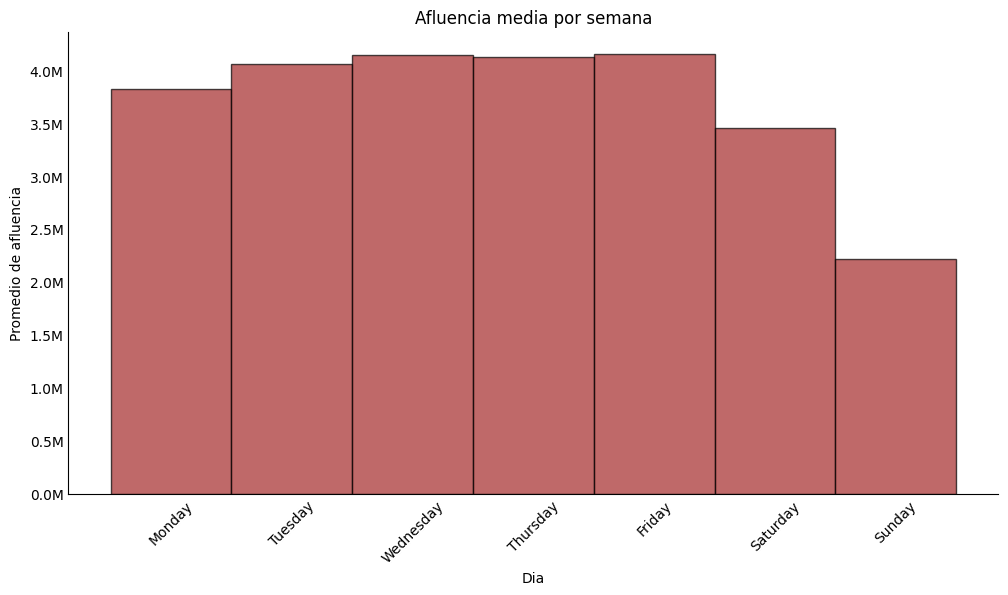

In [40]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(af_mean_pivot.index, bins=len(af_mean_pivot), weights=af_mean_pivot["promedio afluencia"], color='brown', edgecolor='black', alpha=0.7, align='mid')

formatter = FuncFormatter(lambda x, pos: f'{x / 1e7:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

bar_positions = [bin + (bins[i + 1] - bin) / 2 for i, bin in enumerate(bins[:-1])]
plt.xticks(bar_positions, af_mean_pivot.index, rotation=45, ha='center')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

plt.title('Afluencia media por semana')
plt.xlabel('Dia')
plt.ylabel('Promedio de afluencia')

plt.show()

In [41]:

# Crear un DF para calcular la afluencia por linea
total_af = data1.groupby(['linea']).agg({'afluencia': np.sum}).sort_values(by=['afluencia'], ascending=True).reset_index()
total_af

,linea,afluencia
0,Línea 4,69739178
1,Línea 12,81435747
2,Línea 6,105664460
3,Línea 5,169745974
4,Línea 7,213092661
5,Línea A,215150680
6,Línea 9,258385566
7,Línea 1,309165425
8,Línea 8,347253221
9,Línea B,359049654


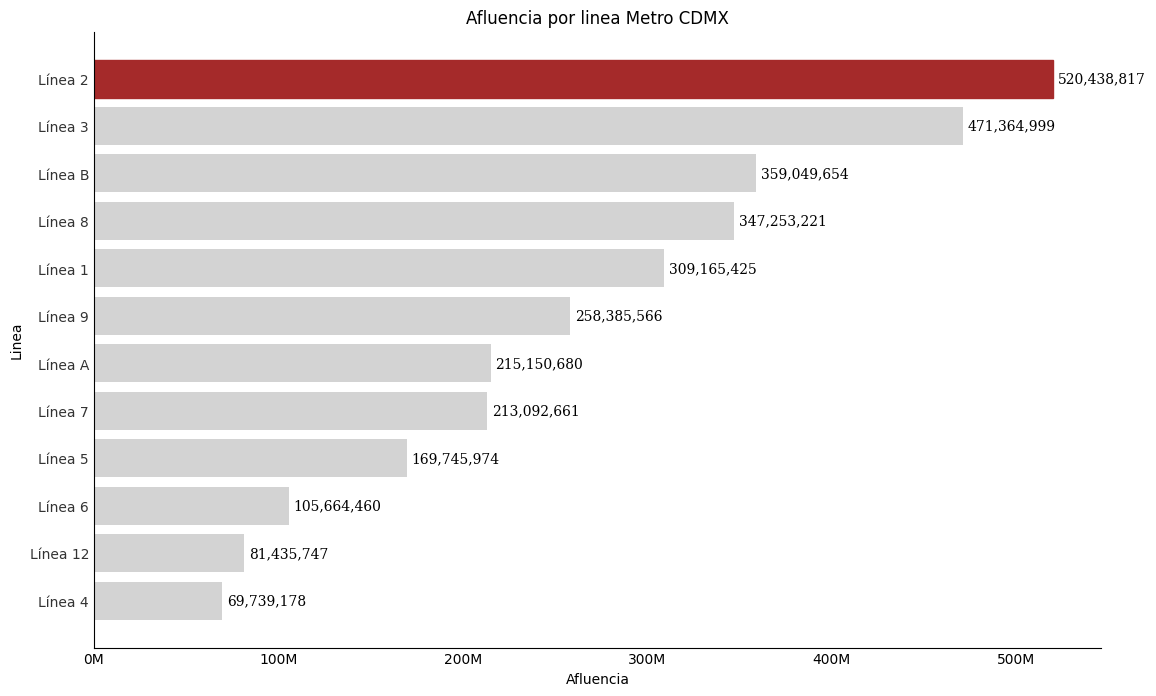

In [53]:
from matplotlib.ticker import FuncFormatter
import locale
locale.setlocale(locale.LC_ALL, '')
plt.figure(figsize=(13, 8))
pos = np.arange(len(total_af['linea']))
bars = plt.barh(pos, total_af['afluencia'], align='center', color='lightgrey')
bars[11].set_color('brown')

for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 0.005 * max(total_af['afluencia']),
             bar.get_y() + bar.get_height() / 2,
             '{:,.0f}'.format(yval),
             ha='left', va='center', fontsize=10, color='black', fontdict={'fontname': 'DejaVu Serif'})

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x * 1e-6))
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Afluencia por linea Metro CDMX')
plt.yticks(pos, total_af['linea'], alpha=0.8)
plt.xlabel('Afluencia')
plt.ylabel('Linea')
plt.show()

In [45]:
# Crear un DF para calcular la afluencia por estacion
total_af_station = data1.groupby(['estacion']).agg({'afluencia': np.sum}).sort_values(by=['afluencia'], ascending=True).reset_index()
total_af_station

,estacion,afluencia
0,Tlaltenco,403258
1,Zapotitlán,1278429
2,Olivos,1454045
3,Lomas Estrella,1846872
4,Tezonco,2099471
...,...,...
158,Cuatro Caminos,58219949
159,Tacubaya,73443525
160,Indios Verdes,89652388
161,Constitución de 1917,90912269


In [48]:
# TOP estaciones del metro com mayor afluencia
afluence_by_station = data1.groupby('estacion')['afluencia'].sum().reset_index()

# Ordenar afluencia
sorted_station = afluence_by_station.sort_values(by='afluencia', ascending=False)

# Tomas las primeras 5 estaciones
top_5_station = sorted_station.head(5)

top_5_station.reset_index(drop=True, inplace=True)

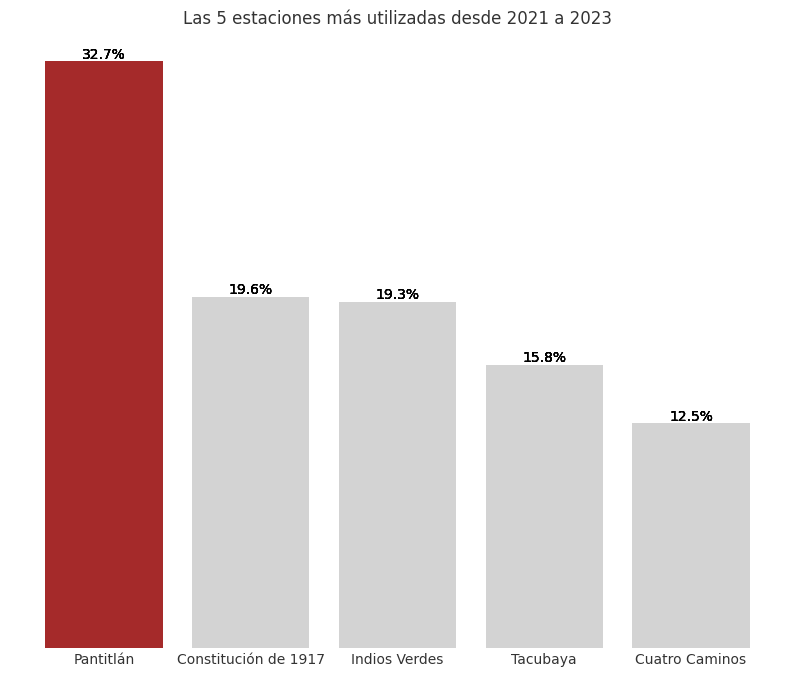

In [52]:
plt.figure(figsize=(10, 8));
pos = np.arange(len(top_5_station['estacion']))
bars = plt.bar(pos, top_5_station['afluencia'], align='center', linewidth=0, color='lightgrey')

bars[0].set_color('brown')
plt.xticks(pos, top_5_station['estacion'], alpha=0.8)
plt.yticks([])
plt.gca().tick_params(axis='x', which='both', length=0)
plt.title('Las 5 estaciones más utilizadas desde 2021 a 2023', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/sum(top_5_station["afluencia"])*100:.1f}%', ha='center', color='black', va='bottom')

In [55]:
import folium
from geopy.geocoders import Nominatim
import time

# Lista de estaciones top 5
estaciones = [
    'Patitlan, Ciudad de México',
    'Constitución de 1917, Ciudad de México',
    'Indios Verdes, Ciudad de México',
    'Tacubaya, Ciudad de México',
    'Cuatro Caminos, Ciudad de México'
]

# Geodificador
geolocator = Nominatim(user_agent="metro_geocoder")

# Función para obtener las coordenadas
def obtener_coordenadas(direccion):
    location = geolocator.geocode(direccion)
    time.sleep(1)  # Evitar ser bloqueado por la API
    return (location.latitude, location.longitude)

# Obtener las coordenadas de las estaciones
estaciones_con_coordenadas = []
for estacion in estaciones:
    try:
        lat, lon = obtener_coordenadas(estacion)
        estaciones_con_coordenadas.append({'name': estacion.split(',')[0], 'lat': lat, 'lon': lon})
    except:
        print(f"No se pudo obtener las coordenadas para {estacion}")

# Crear un mapa centrado en la Ciudad de México
m = folium.Map(location=[19.432608, -99.133209], zoom_start=12)

# Agregar marcadores para cada estación con coordenadas obtenidas
for estacion in estaciones_con_coordenadas:
    folium.Marker(
        location=[estacion['lat'], estacion['lon']],
        popup=estacion['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Mostrar el mapa
m


No se pudo obtener las coordenadas para Patitlan, Ciudad de México
